In [140]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
'''
The Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the strength of sonar 
returns at different angles.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 208 
observations with 60 input variables and 1 output variable. The variable names are as follows:

Sonar returns at different angles
…
Class (M for mine and R for rock)
M = 0
R = 1
The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 53%. 
Top results achieve a classification accuracy of approximately 88%.
'''

'\nThe Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the strength of sonar \nreturns at different angles.\n\nIt is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 208 \nobservations with 60 input variables and 1 output variable. The variable names are as follows:\n\nSonar returns at different angles\n…\nClass (M for mine and R for rock)\nM = 0\nR = 1\nThe baseline performance of predicting the most prevalent class is a classification accuracy of approximately 53%. \nTop results achieve a classification accuracy of approximately 88%.\n'

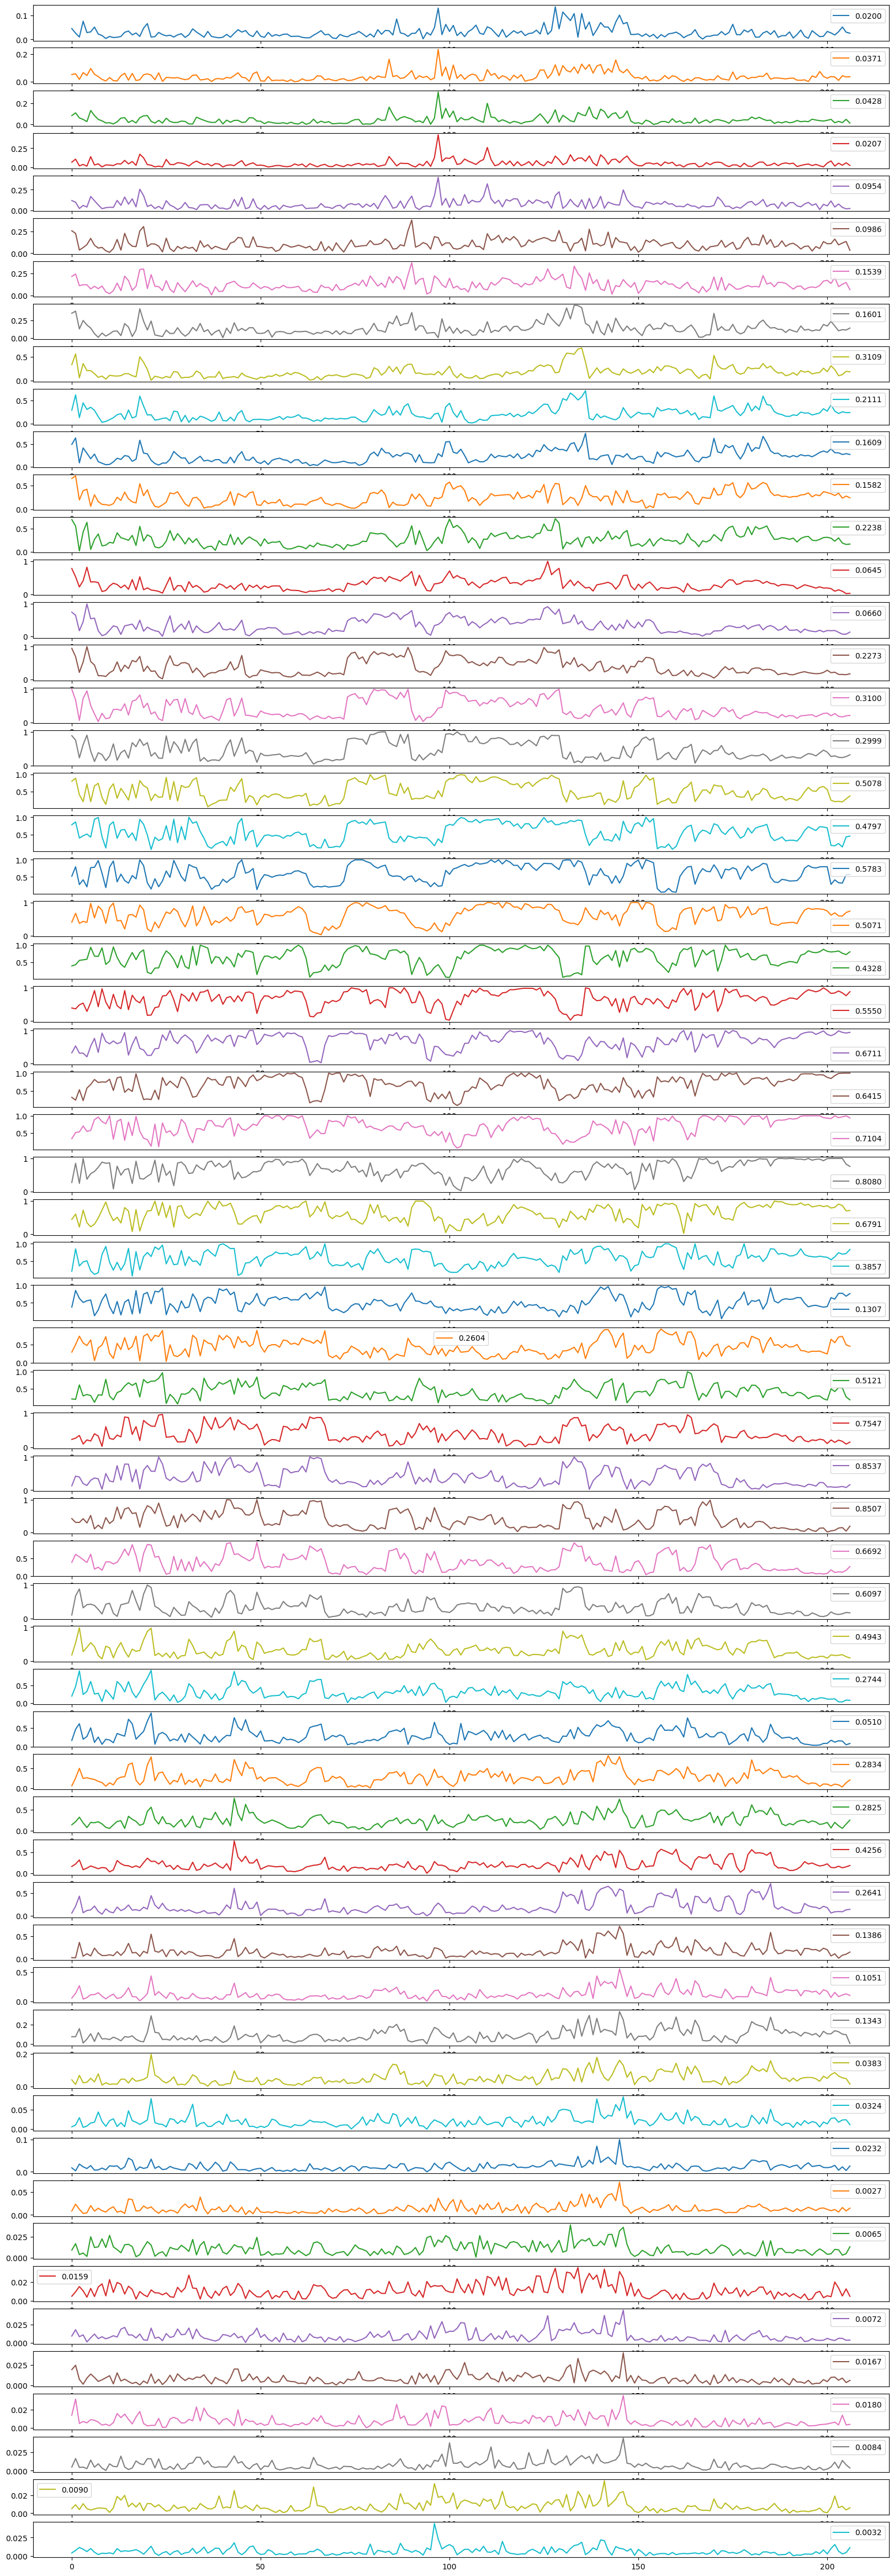

In [142]:
# Phase 1: Load the dataset
sonar = pd.read_csv('dataset/sonar.csv')
sonar.plot(subplots=True, figsize=(20,60), sharex=False, sharey=False)
plt.show()

In [143]:
# Phase 2: Categorization and label encoding
from sklearn.model_selection import train_test_split
Y = sonar['R']
X = sonar.drop(columns=['R']).values

# Phase 3: Labeling the output values as numerical
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(sonar['R'])

In [144]:
# Phase 4: Split data into test and train then check
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)


X train shape:  (165, 60)
Y train shape:  (165,)
X test shape:  (42, 60)
Y test shape:  (42,)


In [145]:
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [146]:
# Phase 5: How to train your model?
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,32,16), activation='relu', solver='adam', batch_size='auto', max_iter=1000, random_state=42)
# Activation function for the hidden layer.
# The solver for weight optimization. Optimize weight related to input opposite of SGD (default train value)
# Size of minibatches for stochastic optimizers.
# Batch size is number of training set for each run
# Random size indicates random generator

# Train
mlp.fit(X_train, Y_train)

# Predict
prediction = mlp.predict(X_test)
print(prediction)

[0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0]


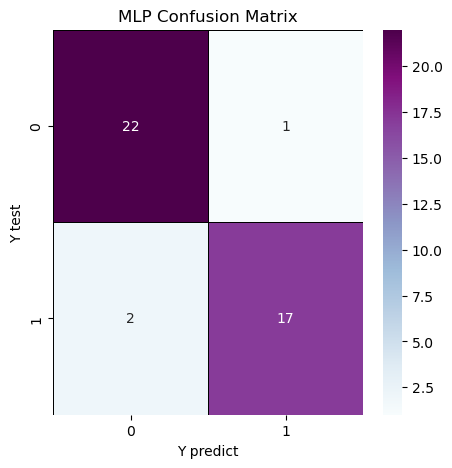

In [147]:
# Phase 7: The confusion matrix
import seaborn as sb
mlp_cm = confusion_matrix(Y_test, prediction)
f, ax = plt.subplots(figsize=(5,5))
sb.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
# Phase 8: Scores
test_acc_mlp = round(mlp.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_mlp = round(mlp.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

model1 = pd.DataFrame({
    'Model': ['MLP'],
    'Train Score': [train_acc_mlp],
    'Test Score': [test_acc_mlp]
})
model1.sort_values(by='Test Score', ascending=False)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
# Precision: Ratio of positive predictions
# Recall: Ratio of true positive 

In [ ]:
import scikitplot as skplt

# Loss function implementation
mlp.predict_proba(X_test) 

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLPClassifier Loss Curve')
plt.show()